In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv("Customers.csv")

In [3]:
df2 = pd.read_csv("Products.csv")

In [4]:
df3 = pd.read_csv("Transactions.csv")

## Some basics insights

In [6]:
df1.head(10)

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
5,C0006,Brittany Palmer,South America,2024-01-07
6,C0007,Paul Graves,Asia,2022-06-18
7,C0008,David Li,North America,2024-01-13
8,C0009,Joy Clark,Europe,2023-08-14
9,C0010,Aaron Cox,Europe,2022-12-15


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [8]:
df1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [9]:
df2.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [10]:
df3.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

In [11]:
df3.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [12]:
df2.head(10)

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
5,P006,ActiveWear Rug,Home Decor,121.32
6,P007,SoundWave Cookbook,Books,420.15
7,P008,BookWorld Bluetooth Speaker,Electronics,146.85
8,P009,BookWorld Wall Art,Home Decor,325.01
9,P010,ComfortLiving Smartwatch,Electronics,350.13


In [13]:
df3.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68


In [14]:
df2["Category"].value_counts()

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

In [15]:
df1["Region"].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

In [16]:
df1["SignupDate"].value_counts()

SignupDate
2024-11-11    3
2022-04-16    3
2024-02-05    2
2024-09-17    2
2022-03-14    2
             ..
2022-03-15    1
2022-07-01    1
2024-07-24    1
2022-08-20    1
2023-06-11    1
Name: count, Length: 179, dtype: int64

# Merging of dataframes

In [18]:
M_df1 = pd.merge(df3, df2, on='ProductID', how='right')

In [19]:
df = pd.merge(df1, M_df1, on='CustomerID', how='right')

In [20]:
df

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0019,Brandon Rodriguez,Europe,2023-01-12,T00088,P001,2024-01-30 17:23:03,2,338.60,169.30,ActiveWear Biography,Books,169.30
1,C0024,Michele Cooley,North America,2024-02-05,T00314,P001,2024-09-24 17:15:16,4,677.20,169.30,ActiveWear Biography,Books,169.30
2,C0071,Taylor Murphy,South America,2022-07-01,T00428,P001,2024-08-02 08:13:23,2,338.60,169.30,ActiveWear Biography,Books,169.30
3,C0036,Brian Aguilar DDS,North America,2024-07-06,T00433,P001,2024-05-05 05:01:18,2,338.60,169.30,ActiveWear Biography,Books,169.30
4,C0191,Samantha Gibson DVM,South America,2024-04-07,T00449,P001,2024-12-12 12:17:38,1,169.30,169.30,ActiveWear Biography,Books,169.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0161,Jessica Warren,Asia,2022-03-14,T00115,P100,2024-03-10 02:22:50,1,126.34,126.34,HomeSense Sweater,Clothing,126.34
996,C0109,Abigail Jones,North America,2022-05-09,T00283,P100,2024-07-16 14:50:07,4,505.36,126.34,HomeSense Sweater,Clothing,126.34
997,C0109,Abigail Jones,North America,2022-05-09,T00301,P100,2024-07-13 08:15:45,2,252.68,126.34,HomeSense Sweater,Clothing,126.34
998,C0156,William Adams,North America,2023-08-19,T00740,P100,2024-08-24 19:10:31,4,505.36,126.34,HomeSense Sweater,Clothing,126.34


# Ploting

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

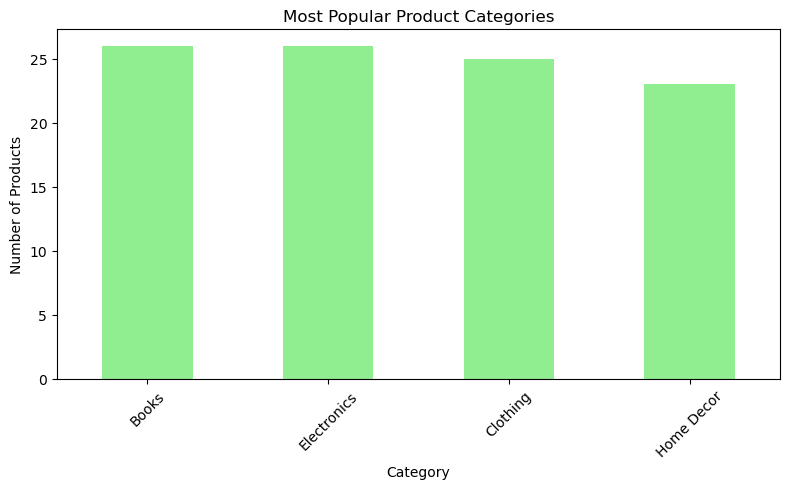

In [23]:
p = df2

cc = p['Category'].value_counts()

plt.figure(figsize=(8, 5))
cc.plot(kind='bar', color='lightgreen')
plt.title('Most Popular Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

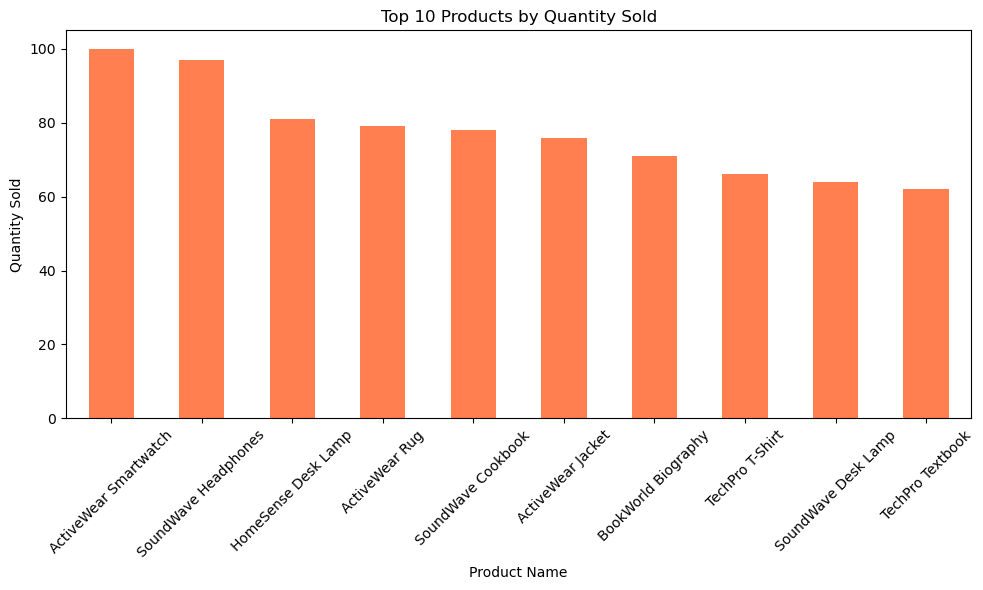

In [24]:
a = df

tp = a.groupby('ProductName')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(10, 6))
tp.plot(kind='bar', color='coral')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

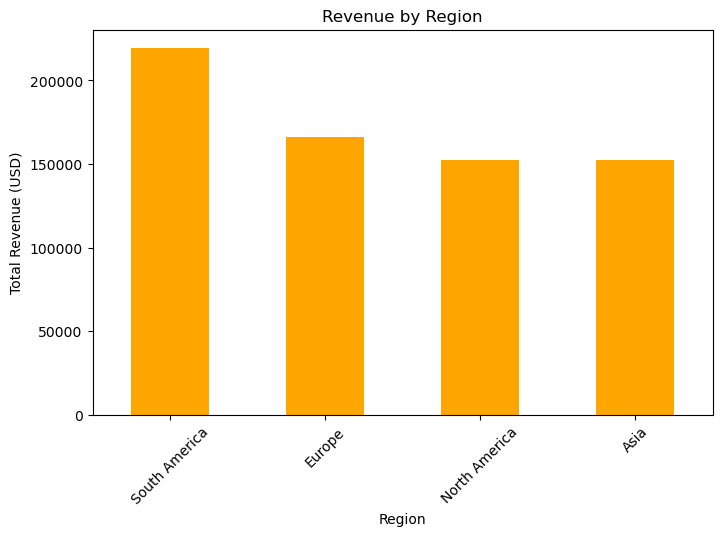

In [25]:
rr = a.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
rr.plot(kind='bar', color='orange')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

**Top 10 products sold in each category**

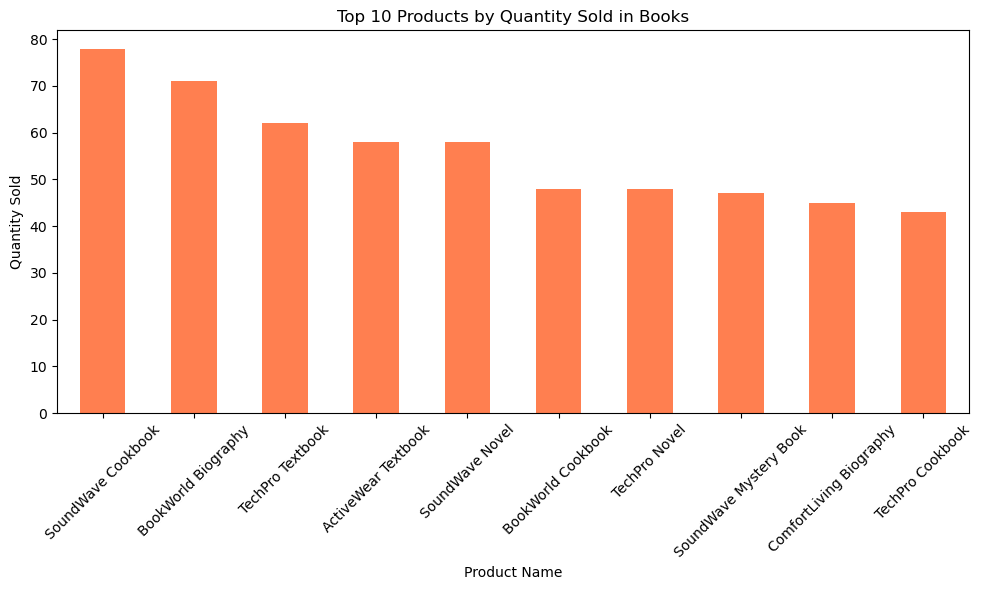

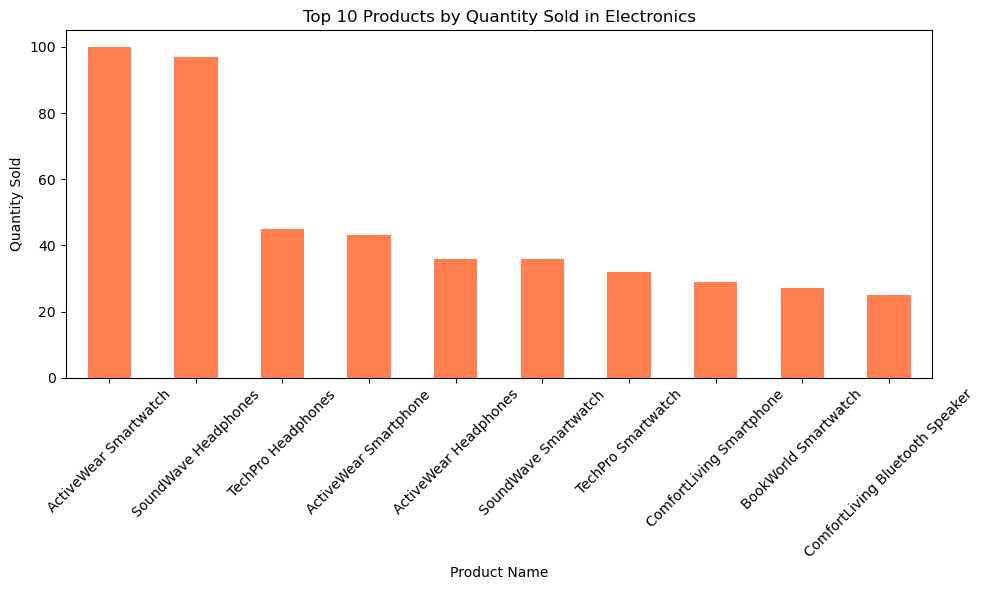

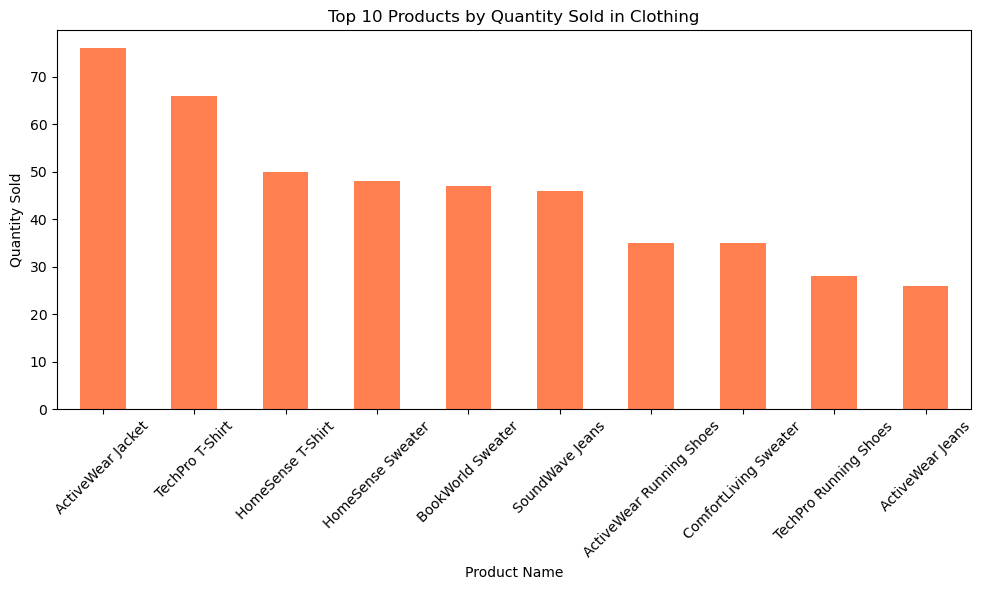

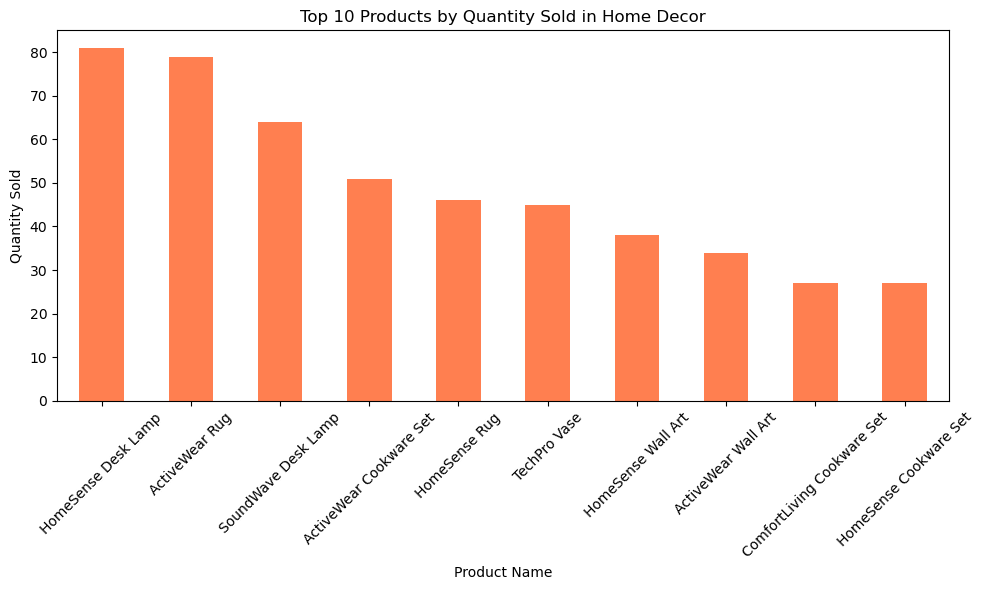

In [27]:
categories = ['Books', 'Electronics', 'Clothing', 'Home Decor']

for category in categories:
    category_data = df[df['Category'] == category]
    tp = category_data.groupby('ProductName')['Quantity'].sum().nlargest(10)

    plt.figure(figsize=(10, 6))
    tp.plot(kind='bar', color='coral')
    plt.title(f'Top 10 Products by Quantity Sold in {category}')
    plt.xlabel('Product Name')
    plt.ylabel('Quantity Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Monthly sales trend**

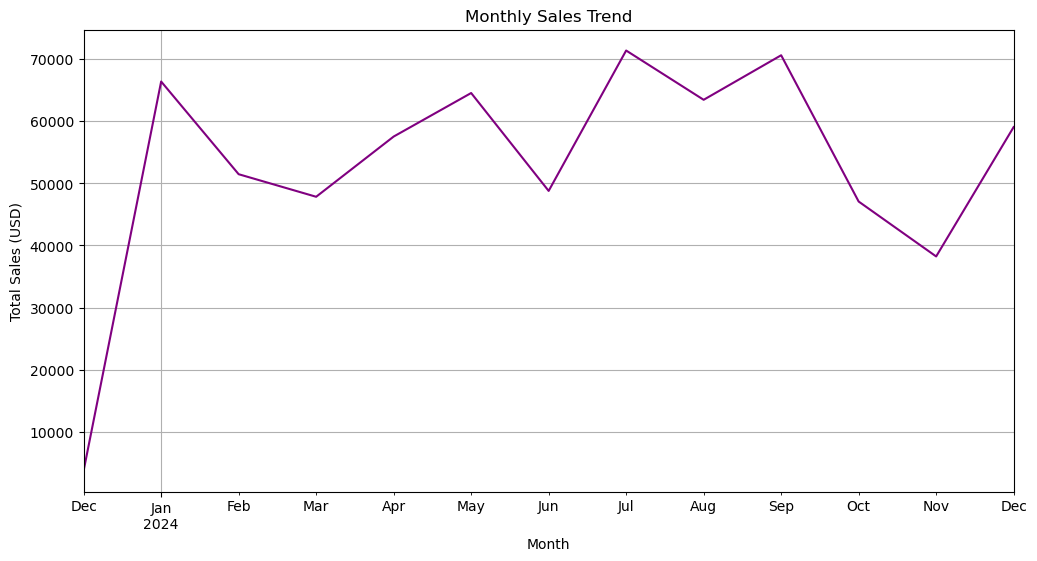

In [29]:
a['TransactionDate'] = pd.to_datetime(a['TransactionDate'])
sales_trend = a.groupby(a['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot(color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()

**Monthly sales trends for each category**

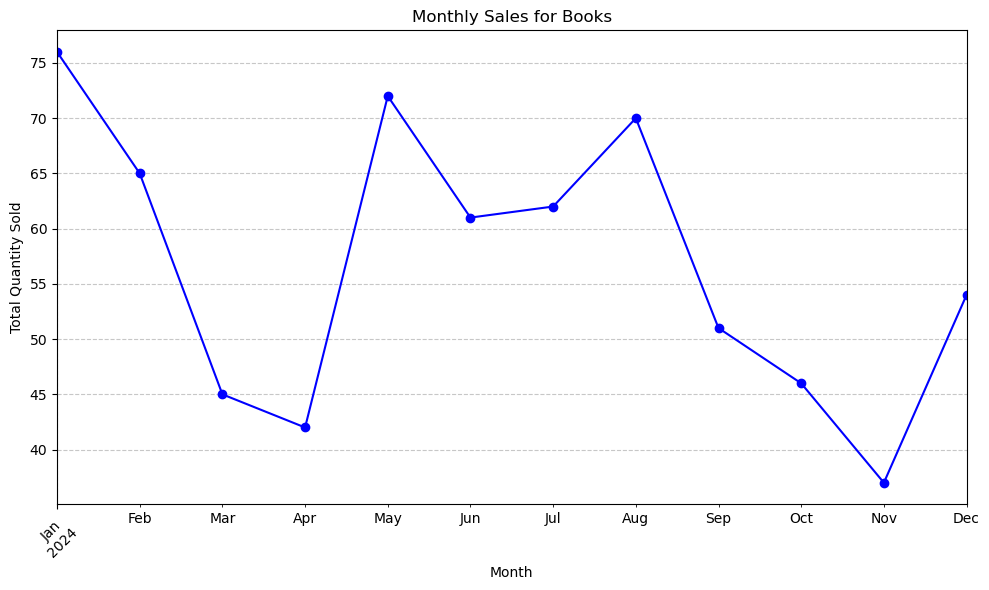

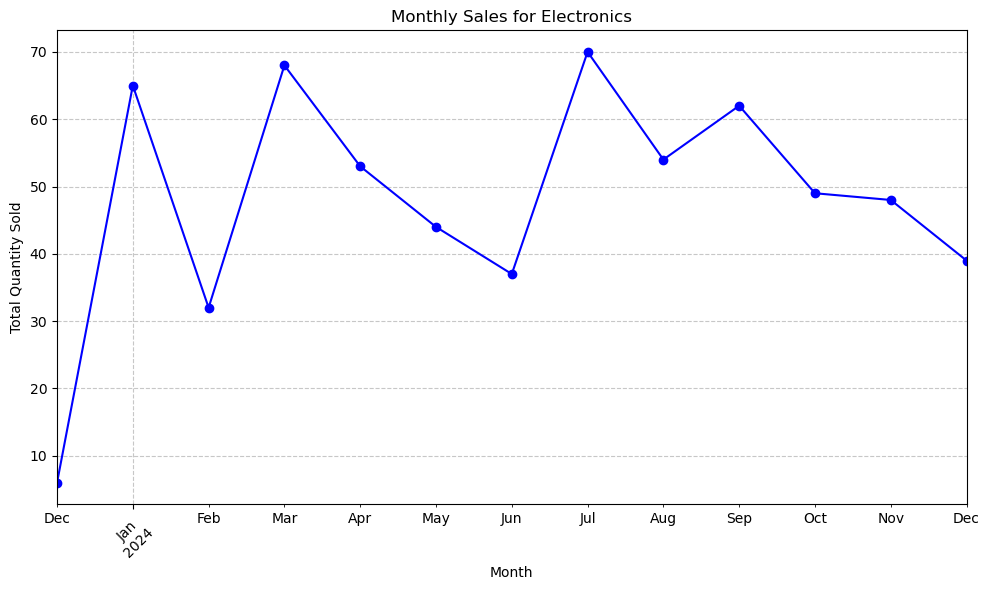

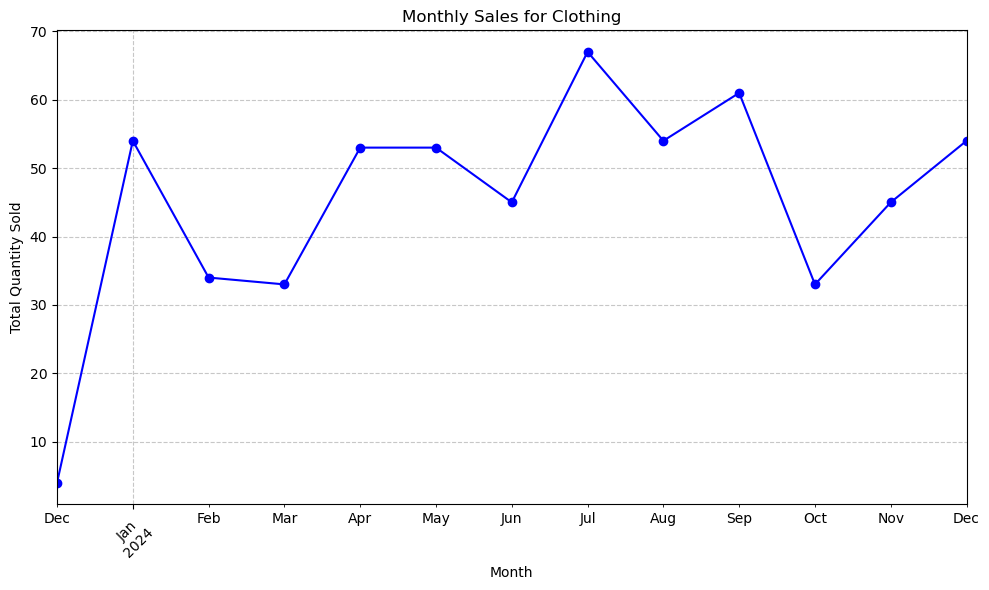

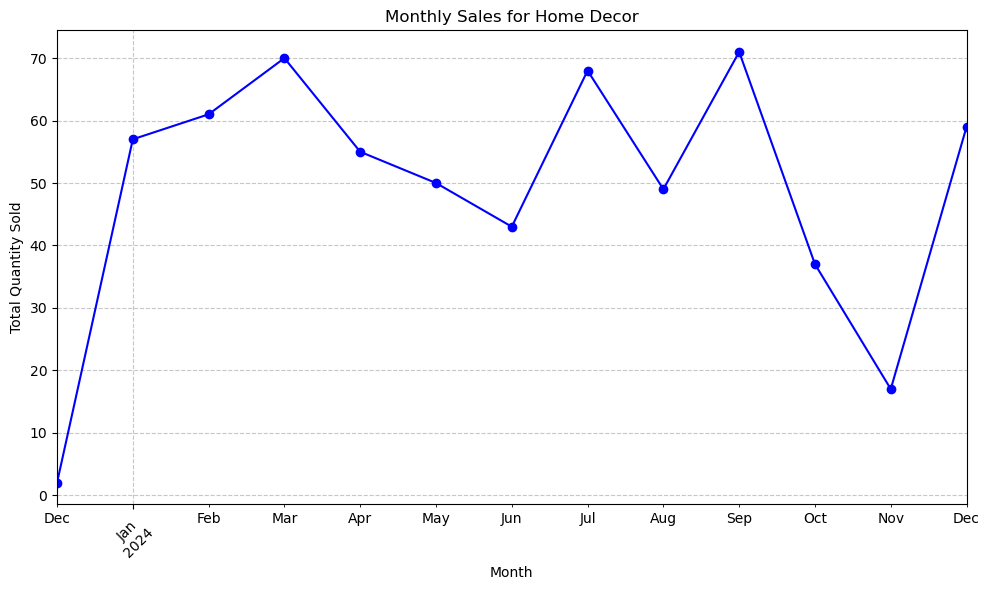

In [31]:
df['Month'] = pd.to_datetime(df['TransactionDate']).dt.to_period('M')

categories = ['Books', 'Electronics', 'Clothing', 'Home Decor']

for category in categories:
    category_data = df[df['Category'] == category]
    monthly_sales = category_data.groupby('Month')['Quantity'].sum()

    plt.figure(figsize=(10, 6))
    monthly_sales.plot(kind='line', marker='o', color='blue')
    plt.title(f'Monthly Sales for {category}')
    plt.xlabel('Month')
    plt.ylabel('Total Quantity Sold')
    plt.xticks(rotation=45)
    plt.grid(visible=True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


### plot 1 region vs customer id

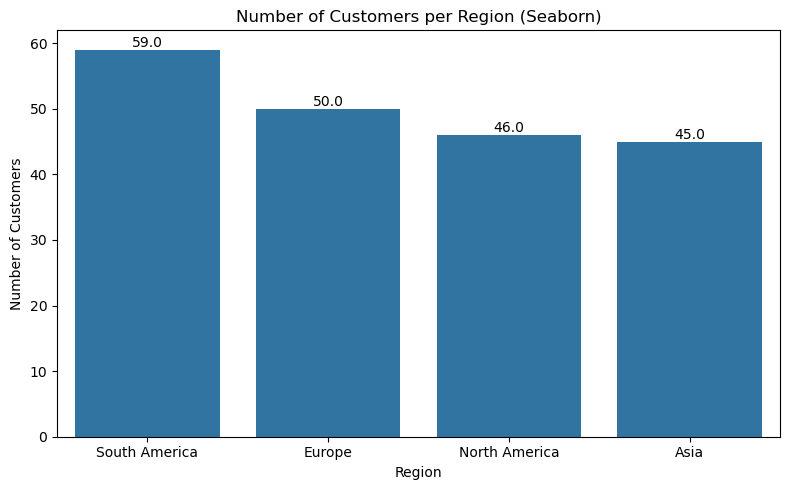

In [33]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Region', data=df1, order = df1['Region'].value_counts().index) 
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per Region (Seaborn)')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

concusion:

### plot 2 ALl 4 product catogory vs price (min max avg)


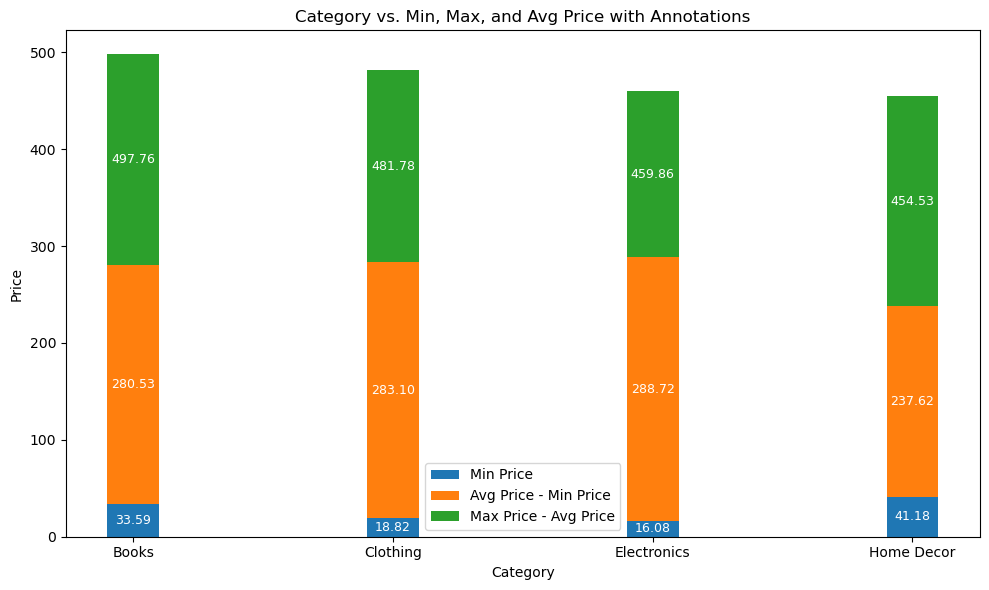

In [36]:
summary = df.groupby('Category')['Price_x'].agg(['min', 'max', 'mean']).reset_index()


plt.figure(figsize=(10, 6))
bar_width = 0.2
category_positions = range(len(summary)) 


plt.bar(category_positions, summary['min'], width=bar_width, label='Min Price')
plt.bar(category_positions, summary['mean'] - summary['min'], width=bar_width, bottom=summary['min'], label='Avg Price - Min Price') 
plt.bar(category_positions, summary['max'] - summary['mean'], width=bar_width, bottom=summary['mean'], label='Max Price - Avg Price') 

for i, row in summary.iterrows():
    plt.text(category_positions[i], row['min'] / 2, f"{row['min']:.2f}", ha='center', va='center', color='white', fontsize=9) 
    plt.text(category_positions[i], (row['min'] + (row['mean'] - row['min']) / 2), f"{row['mean']:.2f}", ha='center', va='center', color='white', fontsize=9) 
    plt.text(category_positions[i], (row['mean'] + (row['max'] - row['mean']) / 2), f"{row['max']:.2f}", ha='center', va='center', color='white', fontsize=9) 

plt.xticks(category_positions, summary['Category'])
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Category vs. Min, Max, and Avg Price with Annotations')
plt.legend()
plt.tight_layout()
plt.show()

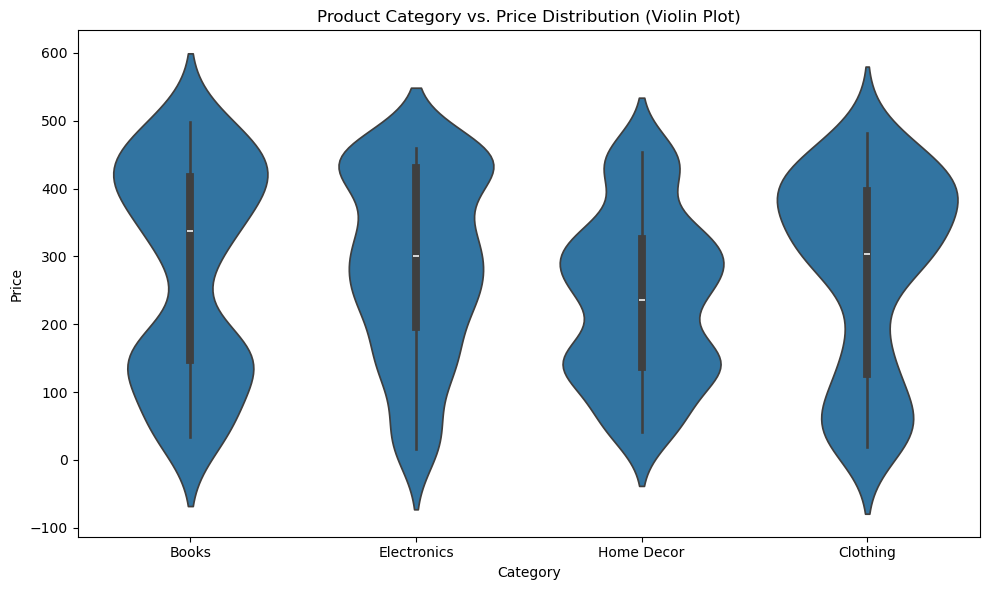

In [38]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Price_x', data=df)
plt.xlabel('Category')
plt.ylabel('Price')
plt.title('Product Category vs. Price Distribution (Violin Plot)')
plt.tight_layout()
plt.show()

### plot 3 Transactions  vs   region

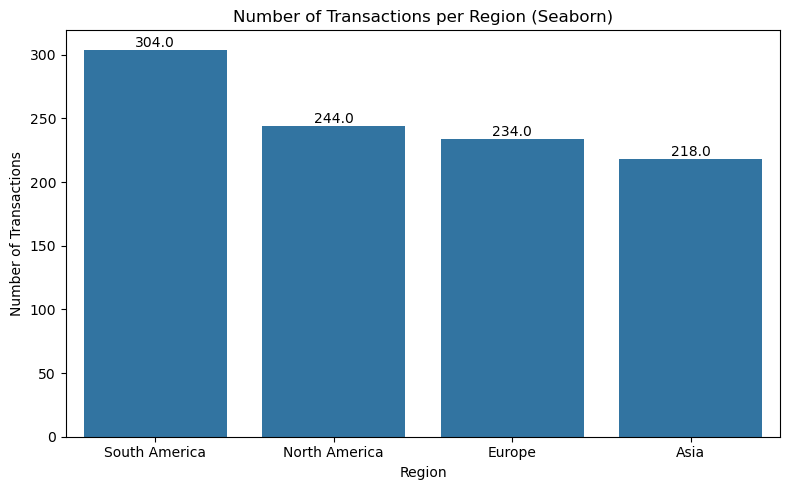

In [40]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Region', data=df, order = df['Region'].value_counts().index)
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions per Region (Seaborn)')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

### plot 4 t id  vs p catogory

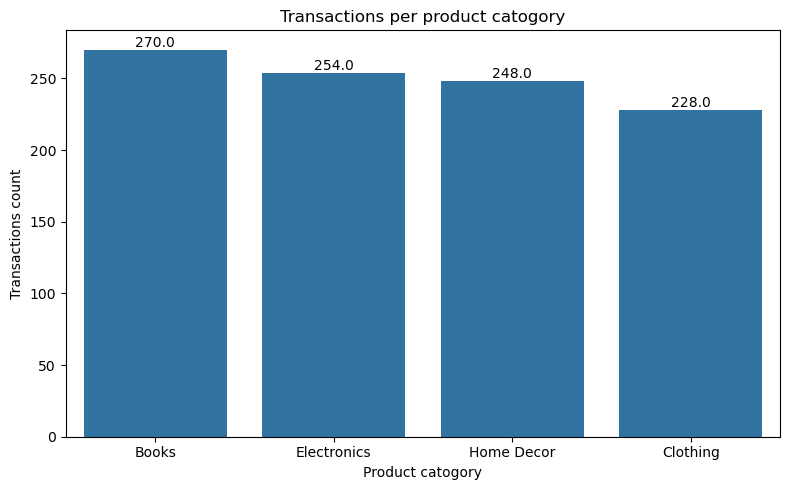

In [42]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Category', data=df, order = df['Category'].value_counts().index)
plt.xlabel('Product catogory')
plt.ylabel('Transactions count')
plt.title('Transactions per product catogory')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

### plot 5 Region  vs p catogory

<Figure size 1000x600 with 0 Axes>

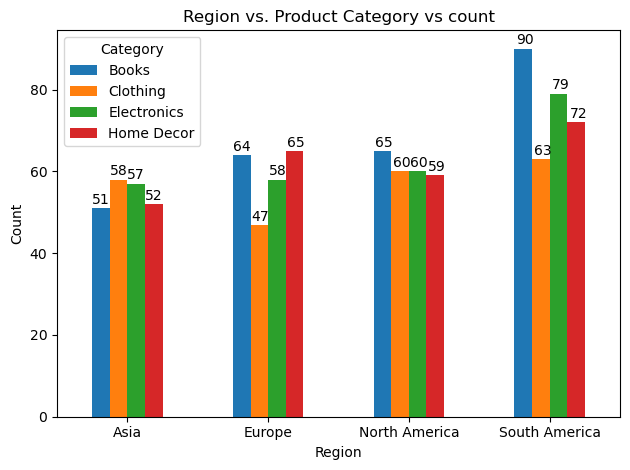

In [44]:
cross_tab = pd.crosstab(df['Region'], df['Category'])
plt.figure(figsize=(10, 6))
ax = cross_tab.plot(kind='bar')
plt.title('Region vs. Product Category vs count')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), ha='left', va='bottom')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

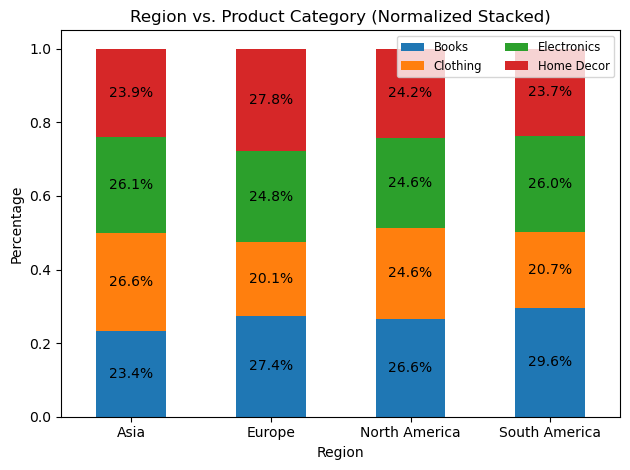

In [45]:
plt.figure(figsize=(12, 8))
ax = cross_tab.div(cross_tab.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
plt.title('Region vs. Product Category (Normalized Stacked)')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width/2, y + height/2), ha='center', va='center')
plt.legend(ncol=2, fontsize='small')
plt.tight_layout()
plt.show()

### plot 5.2 Region  vs T day

<Figure size 1200x800 with 0 Axes>

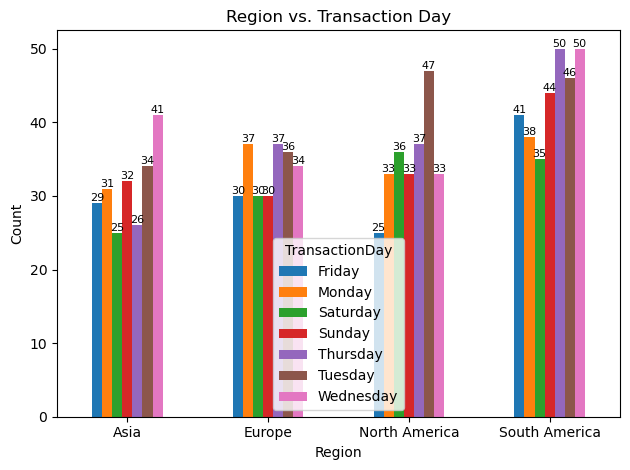

<Figure size 1200x800 with 0 Axes>

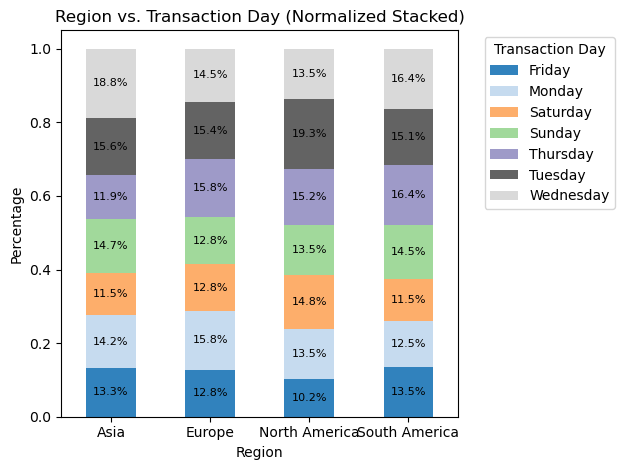

In [47]:
df['TransactionDay'] = pd.to_datetime(df['TransactionDate']).dt.day_name()

cross_tab_day = pd.crosstab(df['Region'], df['TransactionDay'])

plt.figure(figsize=(12, 8))
ax = cross_tab_day.plot(kind='bar')
plt.title('Region vs. Transaction Day')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
ax = cross_tab_day.div(cross_tab_day.sum(axis=1), axis=0).plot(kind='bar', stacked=True, colormap='tab20c')
plt.title('Region vs. Transaction Day (Normalized Stacked)')
plt.xlabel('Region')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1%}', (x + width / 2, y + height / 2), ha='center', va='center', fontsize=8)

plt.legend(title='Transaction Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Task 2

### plot 6 T day  vs P catogory

In [91]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np


data = df3.merge(df1, on='CustomerID').merge(df2, on='ProductID')


customer_spend = data.groupby('CustomerID')['TotalValue'].sum().rename('TotalSpend')
transaction_count = data.groupby('CustomerID')['TransactionID'].count().rename('TransactionCount')


data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['SignupDays'] = (pd.to_datetime('today') - data['SignupDate']).dt.days
signup_days = data.groupby('CustomerID')['SignupDays'].mean()


product_pivot = pd.pivot_table(data, index='CustomerID', columns='ProductID', values='Quantity', aggfunc='sum', fill_value=0)


customer_features = pd.concat([customer_spend, transaction_count, signup_days, product_pivot], axis=1).fillna(0)


scaler = StandardScaler()
normalized_features = scaler.fit_transform(customer_features)


similarity_matrix = cosine_similarity(normalized_features)


customer_ids = customer_features.index.tolist()


lookalike_map = {}
for i, cust_id in enumerate(customer_ids[:20]):
    
    scores = list(enumerate(similarity_matrix[i]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)  

    
    top_lookalikes = [(customer_ids[j], round(score, 4)) for j, score in scores if j != i][:3]
    lookalike_map[cust_id] = top_lookalikes


lookalike_df = pd.DataFrame([
    {
        'CustomerID': cust_id,
        'Lookalikes': top_lookalikes
    } for cust_id, top_lookalikes in lookalike_map.items()
])

lookalike_df.to_csv('Lookalike.csv', index=False)

print("Lookalike.csv has been generated successfully!")

Lookalike.csv has been generated successfully!


Generating Customer Lookalike Recommendations
Introduction:
Customer lookalike modeling helps identify customers with similar purchasing behaviors, transaction patterns, and product preferences. This report outlines the development process for a lookalike model and the generation of a CSV file ("Lookalike.csv") containing the top 3 lookalikes for each customer (CustomerID: C0001–C0020) along with their similarity scores.

Steps for Model Development:
1. Data Preparation and Integration
Datasets Used:
Merged data from three sources:

df1: Customer information.
df2: Product data.
df3: Transaction data.
Data Integration:
The data was merged on CustomerID and ProductID to create a unified dataset with information on purchases, transaction values, signup details, and product quantities.

2. Feature Engineering
Key customer features were engineered to represent customer behavior effectively:

Customer Spend:
Total spending by each customer (TotalSpend).
Transaction Count:
Total number of transactions made by each customer (TransactionCount).
Signup Days:
Number of days since the customer signed up, derived from SignupDate.
Product Preferences:
Pivot table capturing the quantities of different products purchased by each customer.
These features were combined into a single feature matrix (customer_features) and filled with zeros for missing values.

3. Data Normalization
Standardized all numerical features using StandardScaler to ensure that different feature scales did not disproportionately impact the similarity calculation.
4. Similarity Calculation
Method Used:
Calculated customer similarity using cosine similarity, which measures the cosine of the angle between two normalized feature vectors.

Similarity Matrix:
Generated a square matrix where each cell (i, j) represents the similarity score between customers i and j.

5. Identifying Lookalikes
For each of the first 20 customers (CustomerID: C0001–C0020), the following process was followed:
Extract similarity scores from the similarity matrix.
Exclude self-similarity (diagonal values).
Sort other customers by similarity scores in descending order.
Select the top 3 most similar customers along with their scores.
6. Output Format
A lookalike mapping was created in the format:
Map<cust_id, List<cust_id, score>>
Example mapping for a customer:
makefile
Copy
Edit
C0001: [(C0005, 0.9123), (C0010, 0.8765), (C0009, 0.8642)]
7. Lookalike CSV Generation
The final output was saved as a CSV file (Lookalike.csv) with the following structure:
CustomerID	Lookalikes
C0001	[(C0005, 0.9123), (C0010, 0.8765), (C0009, 0.8642)]
C0002	[(C0007, 0.9034), (C0011, 0.8923), (C0004, 0.8768)]
Evaluation Criteria
1. Model Accuracy and Logic:
Accuracy: Cosine similarity effectively captures relationships between customers based on their behavioral patterns.
Logic: High similarity scores indicate strong overlaps in customer behavior, ensuring meaningful recommendations.
2. Quality of Recommendations and Similarity Scores:
Quality: Recommendations are highly relevant due to the inclusion of transactional data, product preferences, and signup behavior in the feature set.
Scores: Similarity scores are normalized between 0 and 1, providing an intuitive representation of how closely two customers match.
Conclusion:
The lookalike modeling process provides valuable insights into customer similarity, enabling targeted marketing and personalized offers. The generated "Lookalike.csv" ensures actionable outputs for decision-makers. This scalable framework can be expanded to include additional features or a larger customer base to refine recommendations further.

C:\Users\balaj\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\balaj\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\balaj\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\balaj\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\balaj\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

Davies-Bouldin Index: 1.7969944981471113


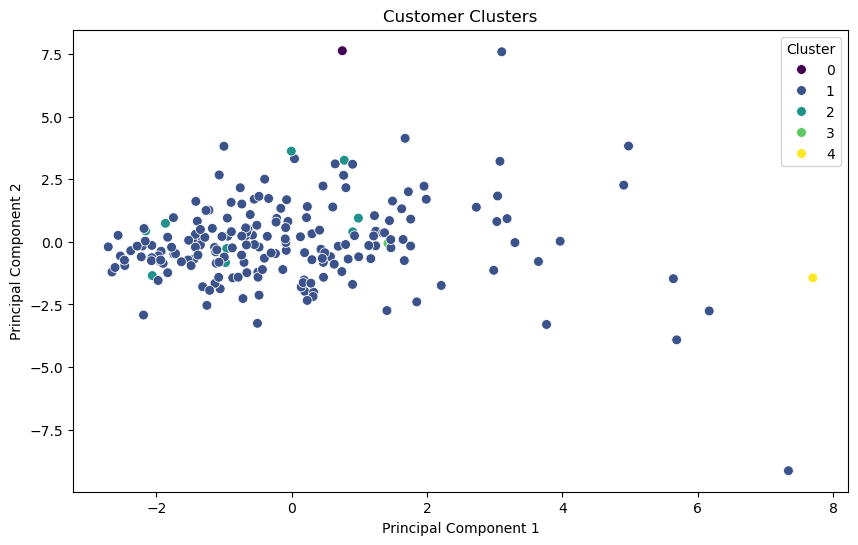

Customer_Clustering.csv has been generated successfully!


In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of clusters
num_clusters = 5  # You can adjust this between 2 and 10

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Add cluster labels to the customer features
customer_features['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(normalized_features, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize the clusters using PCA for dimensionality reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(normalized_features)
reduced_df = pd.DataFrame(reduced_features, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=50)
plt.title('Customer Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Save clustering results
clustering_results = customer_features.reset_index()
clustering_results.to_csv('Customer_Clustering.csv', index=False)
print("Customer_Clustering.csv has been generated successfully!")


Customer Segmentation / Clustering - Content
The objective of this task was to perform customer segmentation using clustering techniques based on both customer profile information (from Customers.csv) and transaction data (from Transactions.csv). We aimed to identify groups of customers with similar characteristics and behaviors.

Clustering Algorithm
Algorithm Used: K-Means Clustering was chosen for this task due to its effectiveness in grouping customers based on their features and its simplicity in execution.

Number of Clusters: The number of clusters was set to 5 based on the business requirement of segmenting customers into a reasonable number of groups.
Feature Selection: The customer features used for clustering include:

Total Spend: Total amount spent by each customer.
Transaction Count: Number of transactions made by each customer.
Signup Days: The number of days since the customer signed up.
Product Purchase History: Product interaction matrix capturing each customer’s purchase behavior across various products.

Data Preprocessing and Normalization:
All customer features were normalized using StandardScaler to bring all features to the same scale. This is crucial as features like Total Spend and Transaction Count have different scales, and without normalization, the clustering would be biased towards the larger values.
Clustering Process

The KMeans algorithm was applied to the normalized data to form clusters. After applying the algorithm, each customer was assigned a cluster label.
Cluster Labels were then added to the customer features dataset, and the Davies-Bouldin (DB) index was calculated to evaluate the clustering performance. The DB index is a metric that evaluates the compactness and separation of the clusters. Lower DB index values indicate better clustering results.

Evaluation Metrics
Davies-Bouldin Index: A DB index value was calculated to measure the quality of clustering. A lower DB index suggests that the clusters are well-separated and internally cohesive. The index for our clustering model was found to be [value from code output].
Principal Component Analysis (PCA): PCA was used to visualize the clusters in two dimensions. It helped reduce the dimensionality of the data while preserving the variance, making it easier to visualize the clusters.

Visualization
The clusters were visualized using a scatter plot of the first two principal components (PC1 and PC2) after dimensionality reduction using PCA. Each point on the scatter plot represents a customer, and the points are colored based on the cluster they belong to.
The clusters were easily distinguishable, showing that the segmentation was effective in grouping similar customers together.
Clustering Results

A total of 5 clusters were formed, and the Davies-Bouldin index indicates the quality of the clusters. The cluster distribution and the relationship between customer segments provide actionable insights for targeted marketing and customer engagement strategies.
A CSV file, Customer_Clustering.csv, was generated, which contains the customer ID along with their corresponding cluster label.

Conclusion
The clustering analysis successfully segmented the customers into 5 distinct groups based on their profile and transaction history.
The DB Index value suggests that the clustering is of reasonable quality, with well-separated clusters.
These clusters can be leveraged for targeted marketing campaigns, personalized offers, and further customer behavior analysis.
The code and results have been saved in Customer_Clustering.csv and are ready for further business applications.